In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%config inlineBackend.figure_format = 'retina'

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os

# Set path to your folder inside Google Drive
data_path = "/content/drive/My Drive/data_psdv"

# List all files in the folder
files = os.listdir(data_path)
print("Files in dataset folder:", files)


Files in dataset folder: ['Data.csv', 'NCAP_Funding.csv', 'State_data.csv', 'Dataset Description.gdoc']


In [124]:
#Loading the datasets
Data = pd.read_csv(os.path.join(data_path, "Data.csv"))
State_Data = pd.read_csv(os.path.join(data_path,'State_data.csv'))
NCAP_Funding = pd.read_csv(os.path.join(data_path,'NCAP_Funding.csv'))

#Checking the first few rows of the datasets
print("Data\n")
print(Data.head())
print("\nState Data\n")
print(State_Data.head())
print("\nNCAP Funding\n")
print(NCAP_Funding.head())

Data

    Timestamp                       station  PM2.5       PM10  \
0  2017-01-01    32Bungalows, Bhilai - CECB    NaN        NaN   
1  2017-01-01          AIIMS, Raipur - CECB    NaN        NaN   
2  2017-01-01  Adarsh Nagar, Jaipur - RSPCB    NaN        NaN   
3  2017-01-01    Airoli, Navi Mumbai - MPCB    NaN  54.743723   
4  2017-01-01    Airport Area, Indore - IMC    NaN        NaN   

                                             address         city   latitude  \
0  Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...       Bhilai  21.194815   
1  All India Institute Of Medical Science, Gate N...       Raipur  21.258815   
2  Psychiatric Centre, Janta Colony, Govind Marg,...       Jaipur  26.902909   
3                                                NaN  Navi Mumbai  19.149400   
4                                                NaN          NaN        NaN   

   longitude         state  
0  81.314770  Chhattisgarh  
1  81.578979  Chhattisgarh  
2  75.836858     Rajasthan  
3  72.

# **1. Spatial Aggregation**


### 1. Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [ ]:
state_grp = Data.groupby('state')["PM2.5"].mean().reset_index()
ans = state_grp[state_grp['PM2.5'] == state_grp['PM2.5'].max()].reset_index(drop=True)
# print(state_grp)
print(ans)
print(f"{ans['state'][0]} has the highest PM2.5 value of {ans['PM2.5'][0]}")

   state       PM2.5
0  Delhi  104.100918
Delhi has the highest PM2.5 value of 104.1009176780069


### 2. Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [65]:
hazardous = Data[(Data['Timestamp'].str[:4] == '2023') & (Data['PM2.5'] > 300)]
# print(hazardous)
state_count=hazardous.groupby(['state', 'Timestamp']).size().reset_index().groupby('state')['Timestamp'].count().reset_index(name='Count')
# print(state_count)
state_count.set_index('state', inplace=True)
# print(state_count)

most_hazardous_state = state_count['Count'].idxmax()
print(most_hazardous_state)   #shows delhi

max_days = state_count.max()['Count']
print(f"{most_hazardous_state} has the most number of days ({max_days}) with PM2.5 levels above 300 in 2023.")

                Count
state                
Andhra Pradesh      2
Assam              21
Bihar              47
Delhi              49
Gujarat             4
Haryana            21
Jharkhand           1
Karnataka          14
Madhya Pradesh      8
Maharashtra        30
Odisha              1
Rajasthan          14
Tamil Nadu          3
Telangana           1
Tripura             1
Uttar Pradesh      24
Delhi
Delhi has the most number of days (49) with PM2.5 levels above 300 in 2023.


### 3. Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

In [14]:
var_data = Data[Data['Timestamp'].str[:4] == '2023']
ans = var_data.groupby('state')['PM2.5'].std().reset_index()
ans = ans[ans['PM2.5'] == ans['PM2.5'].max()].reset_index(drop=True)
print(f"{ans['state'][0]} has the highest variablilty of PM2.5 in 2023 with {ans['PM2.5'][0]} standard deviation")

Delhi has the highest variablilty of PM2.5 in 2023 with 82.79710576209911 standard deviation


### 4. Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [ ]:
data_covid = Data[(Data["Timestamp"].str[:4] == '2020') | (Data["Timestamp"].str[:4] == '2021')]
avg_state = data_covid.groupby('state')['PM2.5'].mean().reset_index()
print(avg_state)
ans = avg_state[avg_state['PM2.5'] == avg_state['PM2.5'].min()].reset_index(drop=True)
print(f"{ans['state'][0]} has the lowest PM2.5 value during covid with {ans['PM2.5'][0]}")

                state       PM2.5
0      Andhra Pradesh   31.861788
1   Arunachal Pradesh   14.751325
2               Assam   61.463611
3               Bihar   75.120788
4          Chandigarh   39.586587
5        Chhattisgarh   24.863968
6               Delhi  100.613293
7             Gujarat   49.954478
8             Haryana   71.858425
9    Himachal Pradesh         NaN
10  Jammu and Kashmir   31.909474
11          Jharkhand   57.042476
12          Karnataka   27.604270
13             Kerala   26.407500
14     Madhya Pradesh   44.957182
15        Maharashtra   44.668592
16            Manipur         NaN
17          Meghalaya   16.579606
18            Mizoram   14.323350
19           Nagaland   32.389944
20             Odisha   46.927677
21         Puducherry   20.198304
22             Punjab   49.561781
23          Rajasthan   56.182164
24             Sikkim         NaN
25         Tamil Nadu   29.679225
26          Telangana   37.936372
27            Tripura   50.124667
28      Uttar 

# **2. Temporal Aggregation**


### 1. Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

In [205]:
data_aug2020 = Data[(Data["Timestamp"].str[:7] == '2020-08')]
# print(data_aug2020)
station_max = data_aug2020.groupby('station')['PM2.5'].max().reset_index()
# print(station_max)
ans = station_max[station_max['PM2.5'] == station_max['PM2.5'].max()].reset_index(drop=True)
print(f"{ans['station'][0]} has the highest PM2.5 value in August 2020 with {ans['PM2.5'][0]}")

Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB has the highest PM2.5 value in August 2020 with 805.51


### 2. For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.
- [Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?


In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:
        return None


station_data = Data[(Data['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB') & (Data['Timestamp'].str[:4] == '2018')]
station_data['Season'] = station_data['Timestamp'].str[5:7].astype(int).apply(get_season)
station_data_mean = station_data.groupby('Season')['PM2.5'].mean().reset_index()
ans = station_data_mean[station_data_mean['PM2.5'] == station_data_mean['PM2.5'].max()].reset_index(drop=True)
print(f"{ans['Season'][0]} has the highest PM2.5 value at Lal Bahadur Shastri Nagar, Kalaburagi in 2018 with {ans['PM2.5'][0]}")

Winter has the highest PM2.5 value at Lal Bahadur Shastri Nagar, Kalaburagi in 2018 with 67.4923443634478


**Ans**
Winter generally has more pollution because of
- Cold air traps pollutants near the ground and preventing dispersion
- Low wind speeds: Causes accumulation of air
- Increased Emmisions: As people feel cold, they consume more and more energy which is produced by burning

### 3. Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:
- Calculate the monthly average PM2.5 for weekdays and weekends separately
- X-axis: Months (January to December).
- Y-axis: Average PM2.5 levels.
- Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.


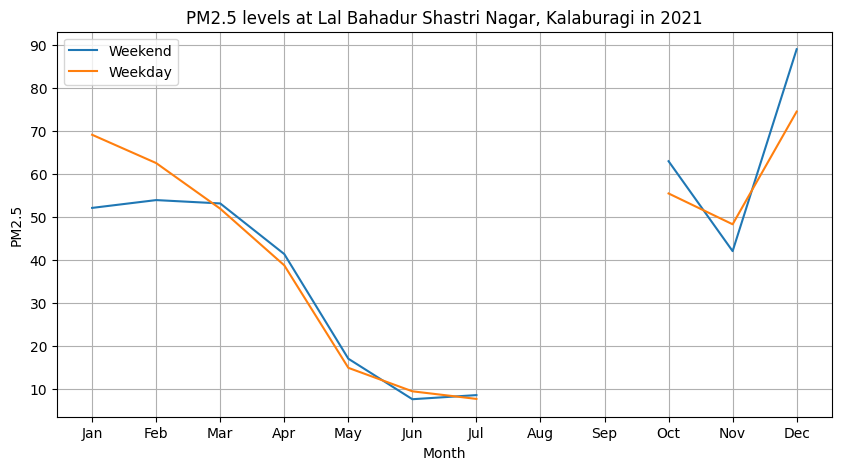

In [ ]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
mon = [i[:3] for i in months]
station_data = Data[(Data['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB') & (Data['Timestamp'].str[:4] == '2021')]
station_data['Timestamp'] = pd.to_datetime(station_data['Timestamp'])
station_data['Day'] = station_data['Timestamp'].dt.day_name()
station_data['Month'] = station_data['Timestamp'].dt.month_name()

#Chronological order of months
station_data['Month'] = pd.Categorical(station_data['Month'], categories=months, ordered=True)

#Grouping by month and calculating mean PM2.5
station_data_weekend = station_data[(station_data['Day'] == 'Saturday') | (station_data['Day'] == 'Sunday')]
station_data_weekday = station_data[(station_data['Day'] != 'Saturday') & (station_data['Day'] != 'Sunday')]
station_data_weekend_mean = station_data_weekend.groupby('Month')['PM2.5'].mean()
station_data_weekday_mean = station_data_weekday.groupby('Month')['PM2.5'].mean()

#Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(mon,station_data_weekend_mean.values, label='Weekend')
plt.plot(mon,station_data_weekday_mean.values, label='Weekday')
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.title('PM2.5 levels at Lal Bahadur Shastri Nagar, Kalaburagi in 2021')
plt.legend()
plt.grid()
plt.show()

# **3. Spatio-temporal aggregation**

### 1. For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    else:
        return None

state_data = Data[Data['Timestamp'].str[:4] == '2022']
state_data['Season'] = state_data['Timestamp'].str[5:7].astype(int).apply(get_season)
season_avg = state_data.groupby(['State','Season'])['PM2.5'].mean().unstack()
season_avg['Difference'] = abs(season_avg['Summer'] - season_avg['Winter']) / season_avg['Summer']
ans = season_avg[season_avg['Difference'] == season_avg['Difference'].max()].reset_index()
print(f"The state with the highest difference in PM2.5 levels between Summer and Winter in 2022 is {ans['State'][0]} with a difference of {ans['Difference'][0]}")

The state with the highest difference in PM2.5 levels between Summer and Winter in 2022 is Manipur with a difference of 1.7852459254500976


### 2. Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

Season
Summer      79.937123
Monsoon     44.170015
Winter     169.586226
Name: PM2.5, dtype: float64


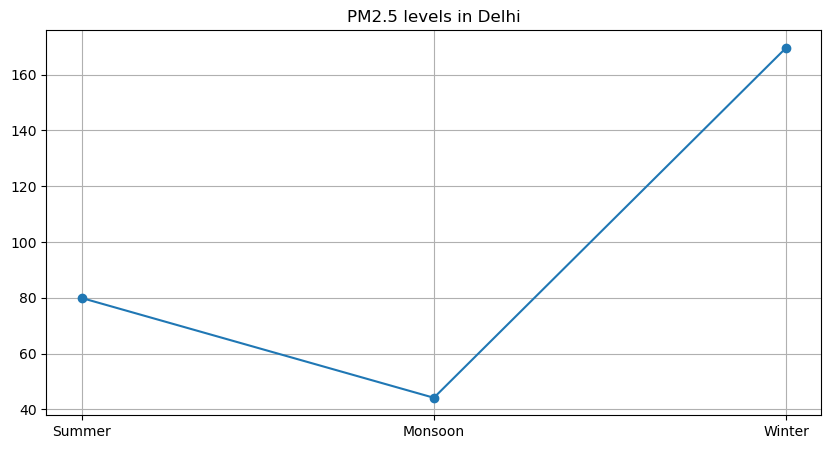

In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:
        return None


season_ord = ['Summer', 'Monsoon', 'Winter']
state_data = Data[(Data['Timestamp'].str[:4].isin(['2017', '2018', '2019', '2020', '2021','2022','2023'])) & (Data['State'] == 'Delhi')]
state_data['Season'] = state_data['Timestamp'].str[5:7].astype(int).apply(get_season)
state_data['Season'] = pd.Categorical(state_data['Season'], categories=season_ord, ordered=True)
season_avg = state_data.groupby('Season')['PM2.5'].mean()
print(season_avg)
#Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(season_avg.index, season_avg.values, marker='o')
plt.title('PM2.5 levels in Delhi')
plt.grid()
plt.show()

#### **Ans**:
- We can see that the average PM2.5 levels in Delhi dips in Monsoon and reaches sky high in Winters

### 3. Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)

Delhi has higher standard deviation(fluctuation) of PM2.5 levels


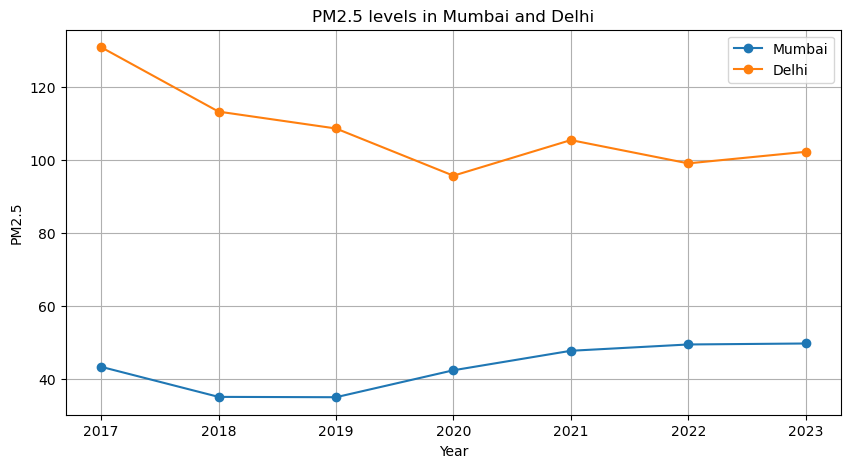

In [ ]:
Mumbai_data = Data[(Data['Timestamp'].str[:4].isin(['2015','2016','2017', '2018', '2019', '2020', '2021','2022','2023'])) & (Data['city'] == 'Mumbai')]
Delhi_data = Data[(Data['Timestamp'].str[:4].isin(['2015','2016','2017', '2018', '2019', '2020', '2021','2022','2023'])) & (Data['State'] == 'Delhi')]
Mumbai_data['Year'] = Mumbai_data['Timestamp'].str[:4]
Delhi_data['Year'] = Delhi_data['Timestamp'].str[:4]
Mumbai_data = Mumbai_data.groupby('Year')['PM2.5'].mean().reset_index()
Delhi_data = Delhi_data.groupby('Year')['PM2.5'].mean().reset_index()

#Standard deviation of PM2.5 levels in Mumbai and Delhi
Mumbai_data_std = Mumbai_data['PM2.5'].std()
Delhi_data_std = Delhi_data['PM2.5'].std()
ans = 'Delhi' if Delhi_data_std > Mumbai_data_std else 'Mumbai'
print(f"{ans} has higher standard deviation(fluctuation) of PM2.5 levels")

#Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(Mumbai_data['Year'], Mumbai_data['PM2.5'], marker='o', label='Mumbai')
plt.plot(Delhi_data['Year'], Delhi_data['PM2.5'], marker='o', label='Delhi')
plt.xlabel('Year')
plt.ylabel('PM2.5')
plt.title('PM2.5 levels in Mumbai and Delhi')
plt.legend()
plt.grid()
plt.show()

# **4. Population-Based**

### 1. Which state in India has the highest number of monitoring stations relative to its population?

In [145]:
station_data=Data.groupby('state')['station'].count().reset_index()
# print(station_data)
population_data= State_Data.groupby('State')['Population'].sum().reset_index()
# print(population_data)
monitoring_relative_data = (station_data['station']/population_data['Population'])
# print(monitoring_relative_data)
ans = monitoring_relative_data[monitoring_relative_data == monitoring_relative_data.max()].reset_index()
print(ans)
print(f"{ans['4']} has the highest number of monitoring stations relative to its population with {ans[0][0]}")

   index         0
0      4  0.008246


KeyError: '4'

### 2. Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

         state         PM2.5  Per Capita PM2.5
6        Delhi  1.384286e+06          0.082457
4   Chandigarh  6.369187e+04          0.060346
8      Haryana  7.170170e+05          0.028283
23   Rajasthan  6.765094e+05          0.009869
27     Tripura  3.419970e+04          0.009309


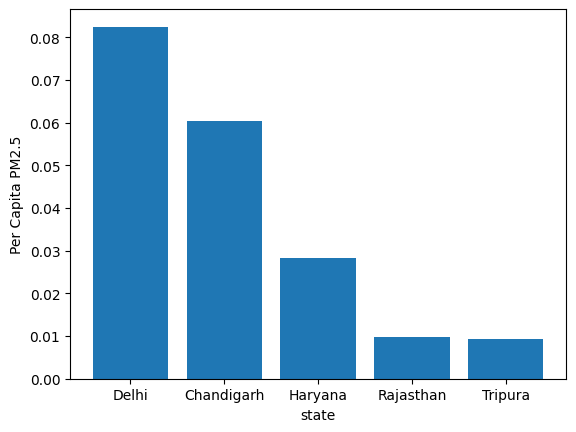

In [207]:
polluted_state = Data[Data['Timestamp'].str[:4] == '2023']
polluted_state = polluted_state.groupby('state')['PM2.5'].sum().reset_index()
# print(polluted_state)
population_data = State_Data.groupby('State')['Population'].sum().reset_index()
# print(population_data)
polluted_state['Per Capita PM2.5'] = polluted_state['PM2.5'] / population_data['Population']
per_capita_PM = polluted_state.sort_values(by='Per Capita PM2.5', ascending=False).head(5)
# print(per_capita_PM)
print(per_capita_PM)

x=per_capita_PM['state']
y=per_capita_PM['Per Capita PM2.5']
plt.xlabel("state")
plt.ylabel("Per Capita PM2.5")
plt.bar(x,y)
plt.show()

### 3. Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
- X-axis: Population density (people per square kilometer).
- Y-axis: Average PM2.5 concentration.
- Use a scatter plot to show the relationship, where each point represents a state.

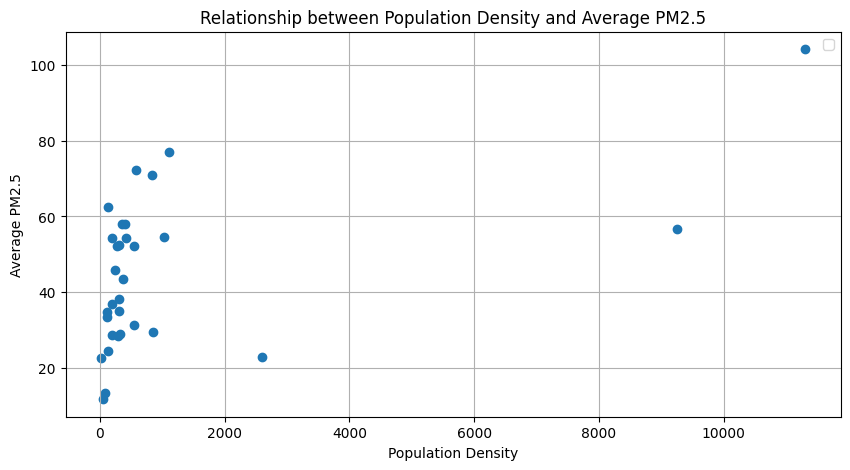

In [220]:
population_data = State_Data.groupby('State')['Population'].sum().reset_index()
# print(population_data)
area_data = State_Data.groupby('State')['Area (km2)'].sum().reset_index()
# print(area_data)

population_data['Population Density'] = population_data['Population'] / area_data['Area (km2)']
# print(population_data)

polluted_data = Data.groupby('state')['PM2.5'].mean().reset_index()
# print(polluted_data)

plt.figure(figsize=(10, 5))
plt.scatter(population_data['Population Density'], polluted_data['PM2.5'])
plt.xlabel('Population Density')
plt.ylabel('Average PM2.5')
plt.title('Relationship between Population Density and Average PM2.5')
plt.grid()
plt.legend(loc='upper right')

plt.show()


# **5. Area - Based**

### 1. Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
- X-axis: States.
- Y-axis: PM2.5 concentration per square kilometer.
- Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.

Delhi has the highest PM2.5 concentration per square kilometer with 6673.121359079138


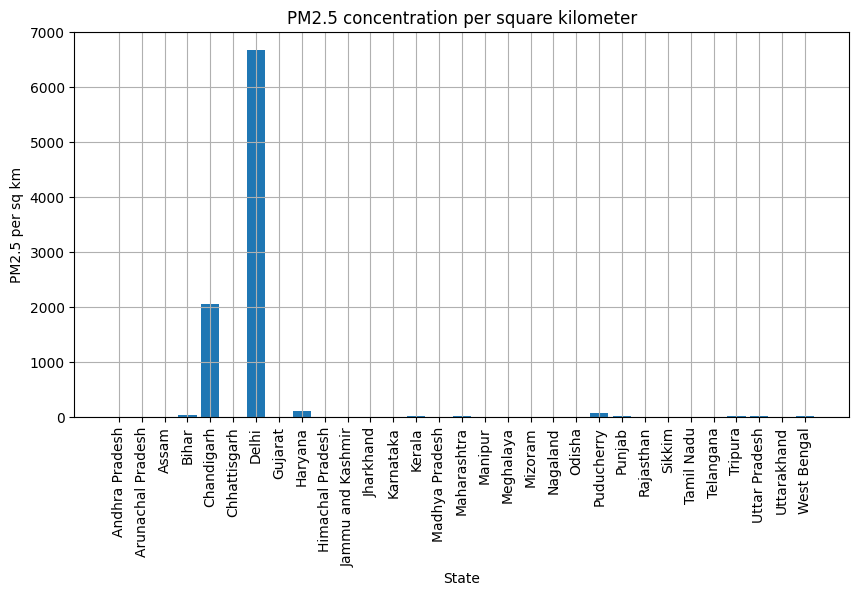

In [108]:
pollution_data=Data.groupby('state')['PM2.5'].sum().reset_index()
# print(pollution_data)

area_data=State_Data.groupby('State')['Area (km2)'].sum().reset_index()
# print(area_data)

pollution_data['PM2.5 per sq km'] = pollution_data['PM2.5'] / area_data['Area (km2)']
# print(pollution_data)

ans = pollution_data[pollution_data['PM2.5 per sq km'] == pollution_data['PM2.5 per sq km'].max()].reset_index(drop=True)
print(f"{ans['state'][0]} has the highest PM2.5 concentration per square kilometer with {ans['PM2.5 per sq km'][0]}")

# print(ans)


x=pollution_data['state']
y=pollution_data['PM2.5 per sq km']

plt.figure(figsize=(10, 5))
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.xlabel('State')
plt.ylabel('PM2.5 per sq km')
plt.title('PM2.5 concentration per square kilometer')
plt.grid()
plt.show()

### 2. Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.

In [110]:
data_state_station = data_state.groupby(['State','Area (km2)'])['station'].nunique().reset_index()
data_state_station["Station_Area"] = data_state_station['station'] / data_state_station['Area (km2)']
ans = data_state_station[data_state_station['Station_Area'] == data_state_station['Station_Area'].max()].reset_index(drop=True)
print(f"{ans['State'][0]} has the highest number of stations per square km of {ans['Station_Area'][0]}")

# Plotting the data
plt.figure(figsize=(16, 8))
sns.barplot(x='State', y='Station_Area', data=data_state_station)
plt.title("Number of stations per sq km in each state")
plt.xticks(rotation=90)
plt.ylabel("Stations per sq km")
plt.show()

NameError: name 'data_state' is not defined

### 3. Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.

In [34]:
state_data=Data[(Data['Timestamp'].str[:4] == '2021') & (Data['state'].isin(['Maharashtra', 'Madhya Pradesh']))]
state_data=state_data.groupby(['state','Timestamp'])['PM2.5'].mean().reset_index()
print(state_data)

population_data = State_Data.groupby('State')['Population'].sum().reset_index()
m_and_m=(population_data[ population_data['State'].isin(['Maharashtra', 'Madhya Pradesh'])])
# print(m_and_m)

area_data=State_Data.groupby('State')['Area (km2)'].sum().reset_index()
m_and_m_area=(area_data[area_data['State'].isin(['Maharashtra', 'Madhya Pradesh'])])

m_and_m['Population Density'] = m_and_m['Population'] / m_and_m_area['Area (km2)']

print('population density with pollution')

print(m_and_m)


              state   Timestamp       PM2.5
0    Madhya Pradesh  2021-01-01  119.286550
1    Madhya Pradesh  2021-01-02  113.684812
2    Madhya Pradesh  2021-01-03  104.068314
3    Madhya Pradesh  2021-01-04  104.142593
4    Madhya Pradesh  2021-01-05   93.836195
..              ...         ...         ...
725     Maharashtra  2021-12-27   86.743499
726     Maharashtra  2021-12-28   80.911611
727     Maharashtra  2021-12-29   57.817885
728     Maharashtra  2021-12-30   70.348044
729     Maharashtra  2021-12-31   73.480025

[730 rows x 3 columns]
population density with pollution
             State  Population  Population Density
14  Madhya Pradesh    72626809          235.608557
15     Maharashtra   112374333          365.192023


As we can see Madhya pradesh has population density 235.608557 and that of Maharashtra is 365.192023
Population of Maharashtra is more than MP although they have similar size we can conclude that more the population density more will be the pollution level is not true as we can see in Madhya Pradesh average PM 2.5 is higher than Maharashtra.

# **6. Funding Based**

### 1. Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

In [32]:
state_pollution=Data[(Data['Timestamp'].str[:4] == '2021')]
state_pollution = state_pollution.groupby('state')['PM2.5'].mean().reset_index()
# print(state_pollution)

NCAP_Funding['Amount released during FY 2021-22'] = pd.to_numeric(
    NCAP_Funding['Amount released during FY 2021-22'], errors='coerce'
)
state_funding=NCAP_Funding.groupby('State')['Amount released during FY 2021-22'].sum().reset_index()
# print(state_funding)

zero_funding_states = state_funding[state_funding['Amount released during FY 2021-22'] == 0].merge(state_pollution, left_on='State', right_on='state', how='inner')
zero_funding_states = zero_funding_states.drop(columns=['state'])
print(zero_funding_states)

zero_funding_states['PM2.5'].mean()
print(f"\nThe average PM2.5 levels between states that have not received NCAP funding in 2021 is {zero_funding_states['PM2.5'].mean()}")

# Separate states with non-zero funding
non_zero_funding_states = state_funding[state_funding['Amount released during FY 2021-22'] > 0].merge(state_pollution, left_on='State', right_on='state', how='inner')
non_zero_funding_states = non_zero_funding_states.drop(columns=['state'])
print("\n",non_zero_funding_states)

non_zero_funding_states['PM2.5'].mean()
print(f"\nThe average PM2.5 levels between states that have received NCAP funding in 2021 is {non_zero_funding_states['PM2.5'].mean()}")

          State  Amount released during FY 2021-22      PM2.5
0         Assam                                0.0  61.017780
1  Chhattisgarh                                0.0  24.863968
2       Gujarat                                0.0  50.780194
3     Jharkhand                                0.0        NaN
4     Meghalaya                                0.0  12.197489
5        Punjab                                0.0  51.940080
6     Rajasthan                                0.0  61.923695
7    Tamil Nadu                                0.0  28.896307
8   West Bengal                                0.0  59.391918

The average PM2.5 levels between states that have not received NCAP funding in 2021 is 43.87642878615332

                State  Amount released during FY 2021-22       PM2.5
0     Andhra Pradesh                              11.48   33.316491
1              Bihar                               4.40   81.967836
2         Chandigarh                               4.61   44.360885


Thus we can conclude that average pm2.5 for funding recieving states is higher than that of non receving states.

### 2. Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?

In [105]:
# Filter data for Assam
assam_data = State_data[State_Data['State'] == 'Assam']

# Extract year from timestamp
assam_data['Year'] = (assam_data['Timestamp'].str[:4]).astype(float)

# Convert funding columns to numeric
assam_data['Amount released during FY 2021-22'] = assam_data['Amount released during FY 2021-22'].replace('-', np.NaN).astype(float)
assam_data['Amount released during FY 2020-21'] = assam_data['Amount released during FY 2020-21'].replace('-', np.NaN).astype(float)
assam_data['Amount released during FY 2019-20'] = assam_data['Amount released during FY 2019-20'].replace('-', np.NaN).astype(float)

fund_19 = assam_data['Amount released during FY 2019-20'].sum()
fund_20 = assam_data['Amount released during FY 2020-21'].sum()
fund_21 = assam_data['Amount released during FY 2021-22'].sum()
fund = [fund_19,fund_20,fund_21]

# Group by year and calculate total funding and average PM2.5 levels
assam_grouped = assam_data.groupby('Year').agg({
    'PM2.5': 'mean'
}).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PM2.5 levels on the left y-axis
ax1.plot(assam_grouped['Year'], assam_grouped['PM2.5'], color='blue', marker='o', label='PM2.5 Levels')
ax1.set_xlabel('Year')
ax1.set_ylabel('PM2.5 Levels (µg/m³)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for NCAP funding
ax2 = ax1.twinx()
ax2.plot([2019.5,2020.5,2021.5], fund, color='green', marker='o', label='NCAP Funding')
ax2.set_ylabel('NCAP Funding (in Crores)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add title and legend
plt.title('PM2.5 Levels and NCAP Funding in Assam Over Time')
fig.tight_layout()
plt.show()


NameError: name 'State_data' is not defined

### 3. Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.

               State  Total fund released  Area (km2)
0     Andhra Pradesh                35.12      162975
1              Assam                12.36       78438
2              Bihar                21.60       94163
3         Chandigarh                17.89         114
4       Chhattisgarh                13.06      135192
5              Delhi                11.25        1484
6            Gujarat                12.00      196024
7   Himachal Pradesh                10.72       55673
8          Jharkhand                 6.00       79716
9          Karnataka                15.14      191791
10    Madhya Pradesh                27.14      308252
11       Maharashtra                63.15      307713
12         Meghalaya                 3.00       22429
13          Nagaland                 7.05       16579
14            Odisha                15.86      155707
15            Punjab                27.52       50362
16         Rajasthan                21.92      342239
17        Tamil Nadu        

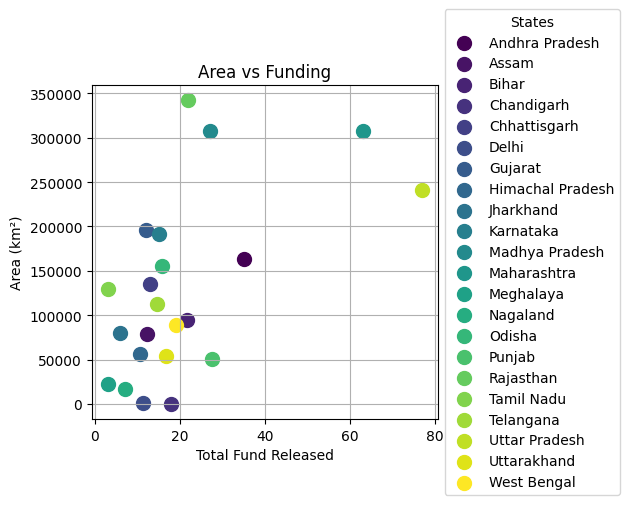

In [53]:
state_funding=NCAP_Funding.groupby('State')['Total fund released'].sum().reset_index()

area_data=State_Data.groupby('State')['Area (km2)'].sum().reset_index()
state_funding=state_funding.merge(area_data, left_on='State', right_on='State', how='inner')
print(state_funding)

colors = np.linspace(0, 1, len(state_funding))  # Generate color values
colormap = plt.cm.viridis

for i in range(len(state_funding)):
    plt.scatter(
        state_funding['Total fund released'][i],
        state_funding['Area (km2)'][i],
        color=colormap(colors[i]),
        label=state_funding['State'][i],
        s=100  # Marker size
    )

plt.xlabel('Total Fund Released')
plt.ylabel('Area (km²)')
plt.title('Area vs Funding')
plt.grid()

# Add legend outside the plot for better visibility
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='States')

# Show the plot
plt.tight_layout()
plt.show()

# **7. Miscellaneous Questions**

### 1. For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [56]:
hazardous = Data[(Data['Timestamp'].str[:4] == '2023') & (Data['PM2.5'] > 300)]
# print(hazardous)
state_count=hazardous.groupby(['state', 'Timestamp']).size().reset_index().groupby('state')['Timestamp'].count().reset_index(name='Count')
# print(state_count)
state_count.set_index('state', inplace=True)
# print(state_count)

most_hazardous_state = state_count['Count'].idxmax()
print(most_hazardous_state)   #shows delhi

max_days = state_count.max()['Count']
print(f"{most_hazardous_state} has the most number of days ({max_days}) with PM2.5 levels above 300 in 2023.")

percentage=max_days/365*100
print(percentage)

Delhi
Delhi has the most number of days (49) with PM2.5 levels above 300 in 2023.
13.424657534246576


### 2. Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

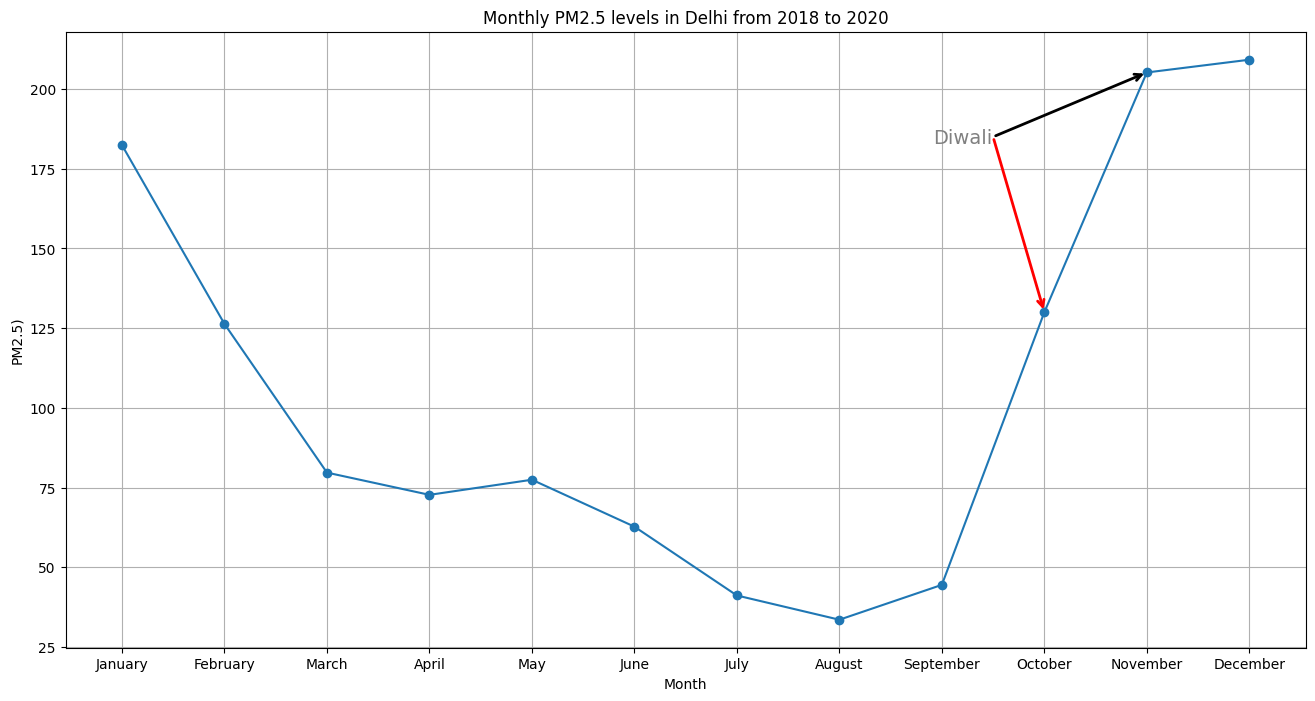

In [97]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
Data_Delhi = Data[(Data['city'] == 'Delhi') & (Data['Timestamp'].str[:4].isin(('2018','2019','2020')))]
Data_Delhi['Month'] = Data_Delhi['Timestamp'].str[5:7].astype(int)
Data_Delhi['Month'] = Data_Delhi['Month'].apply(lambda x: months[x-1])
Data_Delhi['Month'] = pd.Categorical(Data_Delhi['Month'], categories=months, ordered=True)
Data_Delhi_PM25 = Data_Delhi.groupby('Month')['PM2.5'].mean().reset_index()

november_PM25 = Data_Delhi_PM25[Data_Delhi_PM25['Month'] == 'November']['PM2.5'].values[0]
october_PM25 = Data_Delhi_PM25[Data_Delhi_PM25['Month'] == 'October']['PM2.5'].values[0]
november_idx = 10

plt.figure(figsize=(16, 8))
plt.plot(Data_Delhi_PM25['Month'],Data_Delhi_PM25['PM2.5'], marker='o')

diwali_text_x = 8.2
diwali_text_y = 183
plt.text(diwali_text_x, diwali_text_y, 'Diwali', color='grey', fontsize=14, ha='center')
plt.annotate('',
    xy=(november_idx, november_PM25),
    xytext=(8.5, 185),
    arrowprops=dict(color='black', arrowstyle='->',linewidth=2),
    ha = 'center',
    fontsize=12
)
plt.annotate('',
    xy=(9, october_PM25),
    xytext=(8.5, 185),
    arrowprops=dict(color='red', arrowstyle='->',linewidth=2),
    ha = 'center',
    fontsize=12
)

plt.title('Monthly PM2.5 levels in Delhi from 2018 to 2020')
plt.xlabel('Month')
plt.ylabel('PM2.5)')
plt.grid()
plt.show()

### 3. Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.

In [99]:
ncpa_funding_2020 = NCAP_Funding[NCAP_Funding['Amount released during FY 2020-21'] == 2020]
print(ncpa_funding_2020)

Empty DataFrame
Columns: [S. No., State, City, Amount released during FY 2019-20, Amount released during FY 2020-21, Amount released during FY 2021-22, Total fund released, Utilisation as on June 2022]
Index: []


### 4. Draw the map of India and plot the sensor locations on the map.

# **8 Tell us something new**

### 1. Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers.

what percentage of population is